# Movie Content Based Recommender

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import json


In [2]:
credits_df = pd.read_csv('data/tmdb_5000_credits.csv')
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
credits_df['crew'][3729]

'[{"credit_id": "52fe44fec3a368484e042a29", "department": "Production", "gender": 2, "id": 35780, "job": "Producer", "name": "Amitabh Bachchan"}, {"credit_id": "52fe44fec3a368484e042a2f", "department": "Production", "gender": 0, "id": 35793, "job": "Producer", "name": "Abhishek Bachchan"}, {"credit_id": "52fe44fec3a368484e042a43", "department": "Sound", "gender": 0, "id": 76888, "job": "Music", "name": "Ilayaraja"}, {"credit_id": "52fe44fec3a368484e042a35", "department": "Crew", "gender": 2, "id": 96345, "job": "Cinematography", "name": "P. C. Sreeram"}]'

In [4]:
def return_director(x):

    jdata = json.loads(x)
    for d in jdata:
        if d['job'] == 'Director':
            return d['name']
    
    return 'Unknow'


    
    

In [5]:
credits_df['director_name'] = credits_df['crew'].apply(return_director)

In [6]:
credits_df.head()

,movie_id,title,cast,crew,director_name
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton


<Axes: xlabel='count'>

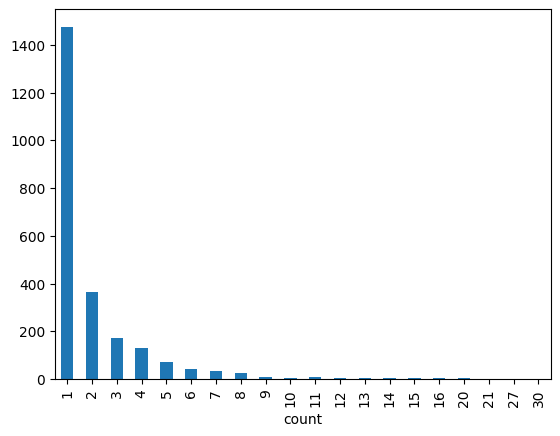

In [7]:
credits_df['director_name'].value_counts().value_counts().sort_index().plot.bar()

In [8]:
credits_df

,movie_id,title,cast,crew,director_name
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Gore Verbinski
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Sam Mendes
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Christopher Nolan
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",Andrew Stanton
...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",Robert Rodriguez
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",Edward Burns
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",Scott Smith
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",Daniel Hsia


In [9]:
movie_df = pd.read_csv('data/tmdb_5000_movies.csv')
movie_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Data Cleaning

In [10]:
movie_df = movie_df[~movie_df['overview'].isna()]

In [11]:
movie_df[~movie_df['overview'].isna()]['overview'].apply(lambda x: len(x.split())).describe()

count    4800.000000
mean       52.157292
std        27.867016
min         0.000000
25%        30.000000
50%        48.000000
75%        67.000000
max       175.000000
Name: overview, dtype: float64

<Axes: >

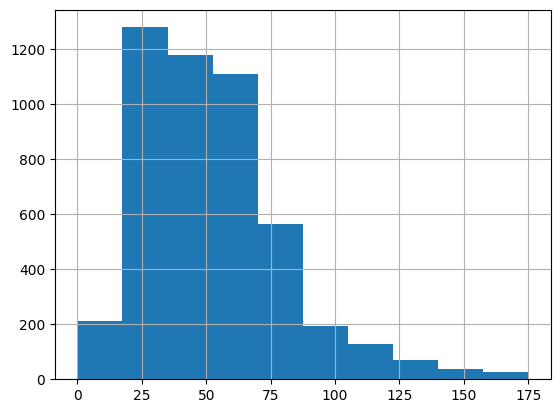

In [12]:
movie_df[~movie_df['overview'].isna()]['overview'].apply(lambda x: len(x.split())).hist()

In [13]:
movie_df[~movie_df['overview'].isna()]['overview'].apply(lambda x: len(x.split())).nsmallest(5)

4401    0
4458    4
2192    6
4638    6
3152    7
Name: overview, dtype: int64

In [14]:
movie_df = movie_df[movie_df['overview'].apply(lambda x: len(x.split())) > 0]

In [15]:
movie_df[~movie_df['overview'].isna()]['overview'].apply(lambda x: len(x.split())).describe()

count    4799.000000
mean       52.168160
std        27.859744
min         4.000000
25%        30.000000
50%        48.000000
75%        67.000000
max       175.000000
Name: overview, dtype: float64

In [16]:
movie_df.reset_index(drop=True,inplace=True)

In [26]:
movie_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4795,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4796,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

# Genres

In [17]:
movie_df['genres'].apply(lambda x: len(json.loads(x))).describe()

count    4799.000000
mean        2.532611
std         1.120747
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: genres, dtype: float64

<Axes: xlabel='genres'>

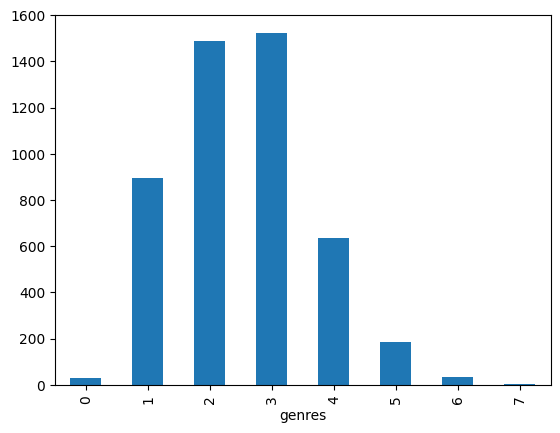

In [18]:
movie_df['genres'].apply(lambda x: len(json.loads(x))).value_counts().sort_index().plot.bar()

In [19]:
def take_genre_set(x):
    genres_movie = set()
    jdata = json.loads(x)
    for d in jdata:
        genres_movie.add(d['name'])
    return genres_movie

In [20]:
all_genres = set()
for i, r in movie_df.iterrows():
    all_genres.update(take_genre_set(r['genres']))

print(all_genres)

{'Thriller', 'Western', 'War', 'Romance', 'Documentary', 'Adventure', 'Action', 'Fantasy', 'Drama', 'Foreign', 'Science Fiction', 'Comedy', 'History', 'Music', 'Crime', 'Animation', 'Family', 'Mystery', 'Horror', 'TV Movie'}


In [21]:
print(len(all_genres))

20


In [22]:
genre_df = movie_df[['id','original_title','genres']].copy()

genre_df = genre_df.reindex(genre_df.columns.tolist() + list(all_genres), axis=1, fill_value=0)

genre_df.head()

,id,original_title,genres,Thriller,Western,War,Romance,Documentary,Adventure,Action,...,Science Fiction,Comedy,History,Music,Crime,Animation,Family,Mystery,Horror,TV Movie
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
def take_genre_list(x):
    genres_movie = []
    jdata = json.loads(x)
    for d in jdata:
        genres_movie.append(d['name'])
    return genres_movie

In [24]:
for i, r in genre_df.iterrows():
    genre_list = take_genre_list(r['genres'])
    for genre in genre_list:
        if genre != 'NA':
            genre_df.loc[i, genre] = 1

In [25]:
genre_df

,id,original_title,genres,Thriller,Western,War,Romance,Documentary,Adventure,Action,...,Science Fiction,Comedy,History,Music,Crime,Animation,Family,Mystery,Horror,TV Movie
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,9367,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4795,72766,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4796,231617,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4797,126186,Shanghai Calling,[],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
genre_matrix = genre_df.iloc[:,3:].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Keywords

In [33]:
movie_df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [34]:
movie_df['keywords'].apply(lambda x: len(json.loads(x))).describe()

count    4799.000000
mean        7.540321
std         6.280373
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        97.000000
Name: keywords, dtype: float64

<Axes: xlabel='keywords'>

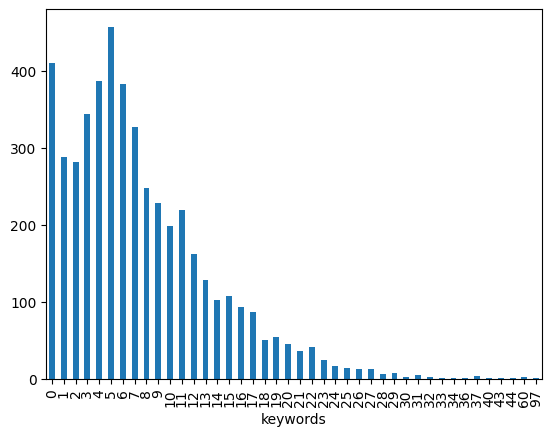

In [35]:
movie_df['keywords'].apply(lambda x: len(json.loads(x))).value_counts().sort_index().plot.bar()


In [36]:
def take_keywords_set(x):
    keywords_movie = set()
    jdata = json.loads(x)
    for d in jdata:
        keywords_movie.add(d['name'])
    return keywords_movie


def take_keywords_list(x):
    keywords_movie = []
    jdata = json.loads(x)
    for d in jdata:
        keywords_movie.append(d['name'])
    return keywords_movie

In [37]:
all_keywords = set()
for i, r in movie_df.iterrows():
    all_keywords.update(take_keywords_set(r['keywords']))

In [38]:
len(all_keywords)

9808

In [39]:
keywords = []
for i, r in movie_df.iterrows():
    keywords += take_keywords_list(r['keywords'])

keywords = pd.Series(keywords)

In [42]:
keywords.value_counts().value_counts()

count
1      5306
2      1551
3       805
4       439
5       334
       ... 
76        1
80        1
81        1
84        1
324       1
Name: count, Length: 88, dtype: int64

## TFIDF

In [43]:
keywords_vectorizer = movie_df[['id','original_title']].copy()

In [44]:
keywords_vectorizer

,id,original_title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter
...,...,...
4794,9367,El Mariachi
4795,72766,Newlyweds
4796,231617,"Signed, Sealed, Delivered"
4797,126186,Shanghai Calling


In [45]:
matrix_of_keywords = []
for i, r in movie_df.iterrows():
    matrix_of_keywords.append(take_keywords_list(r['keywords']))


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_keywords = TfidfVectorizer(max_features=2000, analyzer=lambda x: x)


tfidf_keywords_matrix = tfidf_keywords.fit_transform(matrix_of_keywords)

In [49]:
tfidf_keywords_matrix.shape

(4799, 2000)

# Description

In [50]:
overview_vector = movie_df[['id','original_title']].copy()

In [51]:
movie_df['overview'].str.lower().reset_index(drop=True)

0       in the 22nd century, a paraplegic marine is di...
1       captain barbossa, long believed to be dead, ha...
2       a cryptic message from bond’s past sends him o...
3       following the death of district attorney harve...
4       john carter is a war-weary, former military ca...
                              ...                        
4794    el mariachi just wants to play his guitar and ...
4795    a newlywed couple's honeymoon is upended by th...
4796    "signed, sealed, delivered" introduces a dedic...
4797    when ambitious new york attorney sam is sent t...
4798    ever since the second grade when he first saw ...
Name: overview, Length: 4799, dtype: object

In [52]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")


/opt/homebrew/Caskroom/miniforge/base/envs/forecasting/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [53]:

embeddings = model.encode(movie_df['overview'].str.lower().reset_index(drop=True))
print(embeddings.shape)



(4799, 384)


In [54]:
embeddings

array([[-0.00636549,  0.06156246,  0.03046026, ...,  0.00987916,
         0.03299571,  0.00213422],
       [-0.04036572, -0.02718246, -0.08523669, ..., -0.12784816,
        -0.03175909, -0.00917927],
       [-0.08593848,  0.02028487, -0.0063892 , ..., -0.05187294,
        -0.01104175, -0.0205434 ],
       ...,
       [-0.10077529, -0.00025911,  0.00220244, ..., -0.00393448,
         0.02827759, -0.02771041],
       [-0.07220118, -0.01868926, -0.01226306, ...,  0.02143006,
        -0.02753095,  0.00394997],
       [-0.0465882 , -0.00882528,  0.01785397, ..., -0.01429906,
         0.03644696,  0.05816857]], dtype=float32)

In [ ]:
overview_vector

# Joining all feature

In [71]:
feature_matrix = np.hstack((np.hstack((embeddings, genre_matrix)),tfidf_keywords_matrix.toarray()))

In [74]:
feature_matrix.shape

(4799, 2404)

In [78]:
sim_score = model.similarity(feature_matrix,feature_matrix)

In [86]:
sorted(list(enumerate(sim_score[2])), key= lambda x: x[1], reverse=True)

[(2, tensor(1., dtype=torch.float64)),
 (11, tensor(0.7358, dtype=torch.float64)),
 (1234, tensor(0.7027, dtype=torch.float64)),
 (1542, tensor(0.6533, dtype=torch.float64)),
 (3317, tensor(0.6430, dtype=torch.float64)),
 (1740, tensor(0.6408, dtype=torch.float64)),
 (29, tensor(0.6265, dtype=torch.float64)),
 (1100, tensor(0.6126, dtype=torch.float64)),
 (840, tensor(0.6122, dtype=torch.float64)),
 (147, tensor(0.6104, dtype=torch.float64)),
 (731, tensor(0.6099, dtype=torch.float64)),
 (356, tensor(0.6075, dtype=torch.float64)),
 (1084, tensor(0.6072, dtype=torch.float64)),
 (205, tensor(0.5949, dtype=torch.float64)),
 (1082, tensor(0.5936, dtype=torch.float64)),
 (1076, tensor(0.5934, dtype=torch.float64)),
 (1343, tensor(0.5917, dtype=torch.float64)),
 (1434, tensor(0.5904, dtype=torch.float64)),
 (969, tensor(0.5886, dtype=torch.float64)),
 (4314, tensor(0.5883, dtype=torch.float64)),
 (984, tensor(0.5871, dtype=torch.float64)),
 (164, tensor(0.5802, dtype=torch.float64)),
 (873, 

In [88]:
movie_df.iloc[[2,11,1234]]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
11,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.mgm.com/view/movie/234/Quantum-of-S...,10764,"[{""id"": 627, ""name"": ""killing""}, {""id"": 1568, ...",en,Quantum of Solace,Quantum of Solace continues the adventures of ...,107.928811,"[{""name"": ""Eon Productions"", ""id"": 7576}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-10-30,586090727,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"For love, for hate, for justice, for revenge.",Quantum of Solace,6.1,2965
1234,40000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 28, ""name...",NaN,11398,"[{""id"": 478, ""name"": ""china""}, {""id"": 3292, ""n...",en,The Art of War,When ruthless terrorists threaten to bring dow...,7.832337,"[{""name"": ""Amen Ra Films"", ""id"": 421}, {""name""...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2000-08-23,30199105,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who is your foe?,The Art of War,5.6,135


In [ ]:
sns.distplot(model.similarity(embeddings,embeddings).flatten())

In [ ]:
similarities = model.similarity(embeddings, embeddings)
print(similarities)

In [ ]:
pd.merge(genre_df.drop('genres', axis=1), overview_vector, on='id')

In [ ]:
movie_df[~movie_df['overview'].isna()]['overview'].apply(lambda x: len(x.split())).nsmallest(5)

In [ ]:
movie_df['overview']

In [ ]:
movie_df.loc[[4401,4458,2192,4638]]